In [34]:
import os
import pickle
import pandas as pd
import torch
from pathlib import Path


In [42]:
# 피클 파일
# path = Path(os.getcwd())
# path = ".//data//txt_pkl_v3//txt_pkl_v3/"
path = Path(os.getcwd())
path = str(path.parent.parent) + "\\data\\txt_pkl_v3\\txt_pkl_v3\\"


data_list = os.listdir(path)
len(data_list)

data_dict = {}


for data_name in data_list:
    with open(path + data_name, 'rb') as f:
        data_dict[data_name] = pickle.load(f)

In [43]:
data_dict.keys()

dict_keys(['20171115.pkl', '20171116.pkl', '20171117.pkl', '20171120.pkl', '20171121.pkl', '20171122.pkl', '20171123.pkl', '20171124.pkl', '20171127.pkl', '20171128.pkl', '20171129.pkl', '20171130.pkl', '20171201.pkl', '20171204.pkl', '20171205.pkl', '20171206.pkl', '20171207.pkl', '20171208.pkl', '20171211.pkl', '20171212.pkl', '20171213.pkl', '20171214.pkl', '20171215.pkl', '20171218.pkl', '20171219.pkl', '20171220.pkl', '20171221.pkl', '20171222.pkl', '20171226.pkl', '20171227.pkl', '20171228.pkl', '20180102.pkl', '20180103.pkl', '20180104.pkl', '20180105.pkl', '20180108.pkl', '20180109.pkl', '20180110.pkl', '20180111.pkl', '20180112.pkl', '20180115.pkl', '20180116.pkl', '20180117.pkl', '20180118.pkl', '20180119.pkl', '20180122.pkl', '20180123.pkl', '20180124.pkl', '20180125.pkl', '20180126.pkl', '20180129.pkl', '20180130.pkl', '20180131.pkl', '20180201.pkl', '20180202.pkl', '20180204.pkl', '20180205.pkl', '20180206.pkl', '20180207.pkl', '20180208.pkl', '20180209.pkl', '20180212.pkl

## supervised_dataset 만들기

1. 키값을 가져옴
2. day 설정
3. day에 해당하는 수익률 가져오기

In [ ]:
# 일자에 맞는 데이터 셋을 찾는 코드입니다.
# def make_sup_data(data, day):


In [45]:
imp_data = data_dict['20171115.pkl'].iloc[:, :5]

In [46]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [47]:
imp_data

,텍스트,0,1,2,3
주가번호,,,,,
383646,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.007559,0.023758,0.014039,0.019438
383617,"막연한 우려 대비 견조한 펀더멘탈3분기 지배순익 2,152억원(YoY +115.1%...",-0.028422,-0.012923,-0.010342,0.036166
383236,실적 Review2017.11.15 What’s new : 제일제당의 삼성생명 지분...,-0.028422,-0.012923,-0.010342,0.036166
383453,이제는 내년 소비재 주가상승 기대감으로 매수 Nov 201715 ▶ Highligh...,-0.028422,-0.012923,-0.010342,0.036166
383647,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.011665,0.029692,0.045599,0.057264
...,...,...,...,...,...
383209,"Results Comment 104,00071,400 투자의견 BUY, 목표주가 1...",0.019231,0.038462,0.065934,0.092033
383195,"3분기 실적 리뷰: 시장 기대치 상회 3분기 연결 매출 5,693원(YoY +224...",0.019231,0.038462,0.065934,0.092033
383305,"- 국내 턴어라운드는 시장의 기대보다 가파른 상황이며, Acushnet와 USA도 ...",0.019231,0.038462,0.065934,0.092033


In [50]:
imp_data.iloc[:, 1:5]

,0,1,2,3
주가번호,,,,
383646,0.007559,0.023758,0.014039,0.019438
383617,-0.028422,-0.012923,-0.010342,0.036166
383236,-0.028422,-0.012923,-0.010342,0.036166
383453,-0.028422,-0.012923,-0.010342,0.036166
383647,0.011665,0.029692,0.045599,0.057264
...,...,...,...,...
383209,0.019231,0.038462,0.065934,0.092033
383195,0.019231,0.038462,0.065934,0.092033
383305,0.019231,0.038462,0.065934,0.092033


In [54]:
imp_data.iloc[:, 1:5] *100

,0,1,2,3
주가번호,,,,
383646,0.75594,2.37581,1.403888,1.943844
383617,-2.84222,-1.292317,-1.034182,3.616624
383236,-2.84222,-1.292317,-1.034182,3.616624
383453,-2.84222,-1.292317,-1.034182,3.616624
383647,1.16649,2.969247,4.559915,5.726405
...,...,...,...,...
383209,1.923077,3.846154,6.593407,9.203297
383195,1.923077,3.846154,6.593407,9.203297
383305,1.923077,3.846154,6.593407,9.203297


In [51]:
# similar = cosine_similarity(pd.DataFrame(imp_data.iloc[:, 1]), pd.DataFrame(imp_data.iloc[:, 1]))
similar = cosine_similarity(imp_data.iloc[:, 1:5], imp_data.iloc[:, 1:5])

In [53]:
similar.shape

(261, 261)

In [55]:
similar_100 = cosine_similarity(imp_data.iloc[:, 1:5]*100,imp_data.iloc[:, 1:5]*100)

In [56]:
similar_100

array([[ 1.        ,  0.02125572,  0.02125572, ...,  0.90084297,
         0.90084297, -0.46053757],
       [ 0.02125572,  1.        ,  1.        , ...,  0.27076139,
         0.27076139, -0.6608666 ],
       [ 0.02125572,  1.        ,  1.        , ...,  0.27076139,
         0.27076139, -0.6608666 ],
       ...,
       [ 0.90084297,  0.27076139,  0.27076139, ...,  1.        ,
         1.        , -0.7864043 ],
       [ 0.90084297,  0.27076139,  0.27076139, ...,  1.        ,
         1.        , -0.7864043 ],
       [-0.46053757, -0.6608666 , -0.6608666 , ..., -0.7864043 ,
        -0.7864043 ,  1.        ]])

In [57]:
from scipy import stats


In [69]:
imp_data.iloc[:, 1:5]

,0,1,2,3
주가번호,,,,
383646,0.007559,0.023758,0.014039,0.019438
383617,-0.028422,-0.012923,-0.010342,0.036166
383236,-0.028422,-0.012923,-0.010342,0.036166
383453,-0.028422,-0.012923,-0.010342,0.036166
383647,0.011665,0.029692,0.045599,0.057264
...,...,...,...,...
383209,0.019231,0.038462,0.065934,0.092033
383195,0.019231,0.038462,0.065934,0.092033
383305,0.019231,0.038462,0.065934,0.092033


In [ ]:
# similar_100 = cosine_similarity(pd.DataFrame(imp_data.iloc[:, 1])*100, pd.DataFrame(imp_data.iloc[:, 1])*100)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
similar.std()

0.6897228182826525

<Axes: >

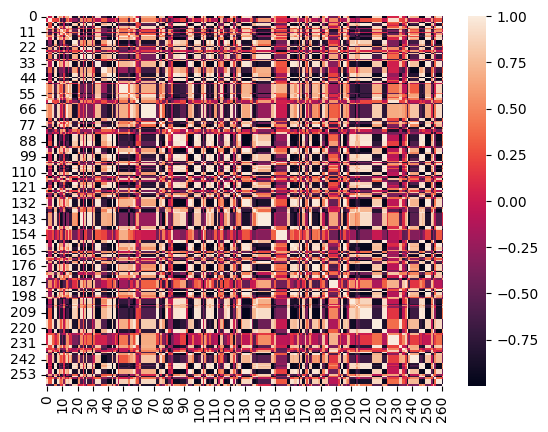

In [61]:
sns.heatmap(similar_100)


<Axes: >

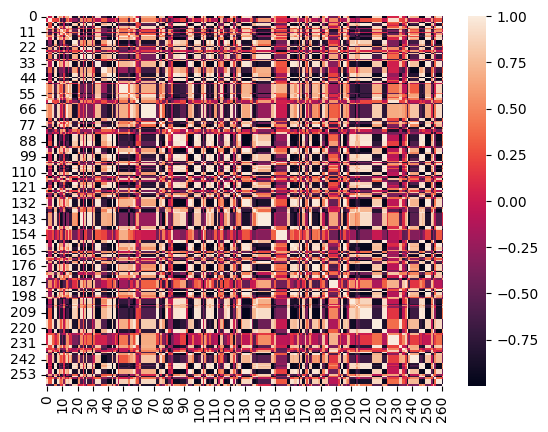

In [62]:
sns.heatmap(similar)


In [67]:
sns.heatmap(corr_data)

ValueError: zero-size array to reduction operation fmin which has no identity